In [10]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Fetching MSFT Stock prices (2022-2025) from yahoo finance and storing the data as a csv file.

In [11]:
import yfinance as yf
import pandas as pd
ticker="MSFT"
data=yf.download(ticker, start="2022-01-01", end="2025-12-31")

data.to_csv("../data/raw/MSFT_stock_data.csv")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2022-01-03,323.898407,327.043052,319.089518,324.478963,28865100
2022-01-04,318.344421,324.333761,315.548093,323.975731,32674300
2022-01-05,306.123871,315.499751,305.736844,315.296537,40054300
2022-01-06,303.704956,308.368713,301.392419,302.998610,39646100
2022-01-07,303.859772,306.240018,300.037807,303.966192,32720000


In [12]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1002 entries, 2022-01-03 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1002 non-null   float64
 1   (High, MSFT)    1002 non-null   float64
 2   (Low, MSFT)     1002 non-null   float64
 3   (Open, MSFT)    1002 non-null   float64
 4   (Volume, MSFT)  1002 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.0 KB


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03
mean,361.870924,365.198554,358.289533,361.852402,2.542506e+07
std,88.383661,88.549495,88.184771,88.480070,1.054114e+07
min,208.659073,214.658329,207.860430,211.872927,5.855900e+06
25%,279.310387,282.505195,276.082875,279.842231,1.840280e+07
50%,369.170746,371.638386,365.608824,369.490964,2.283290e+07
75%,423.130135,426.250640,419.575490,422.902187,2.933995e+07
max,541.057373,553.502444,539.759814,553.283183,9.042890e+07


Plotting clossing MSFT prices of each year: shows volatility, anomaly zones, if the market is growth-oriented or not.

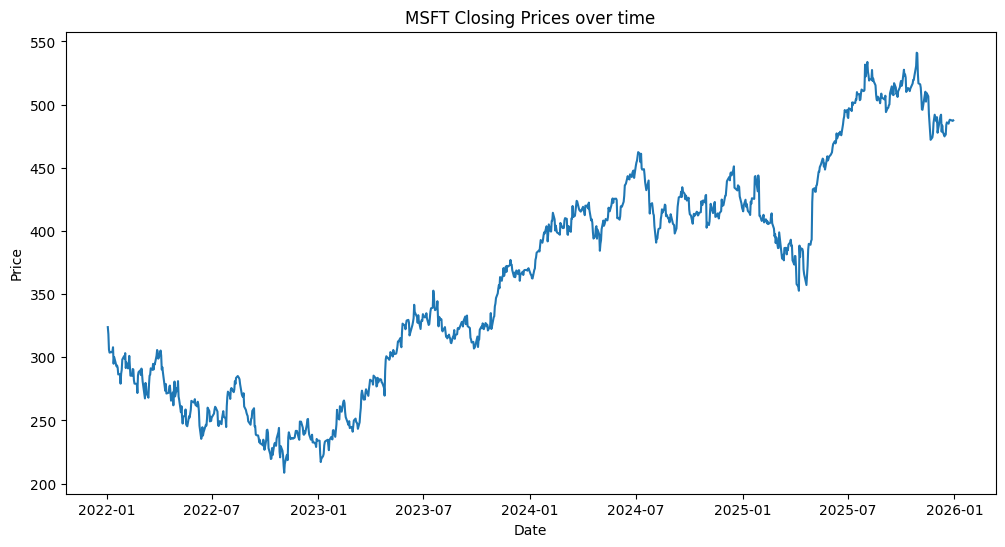

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data.index,data["Close"])
plt.title("MSFT Closing Prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Here, we see:
clear, long term growth-oriented trend
volatile zones for anomalies (steep rises/drops)
potential market shock events (sudden dips followed by recovery)

Daily return captures relative change

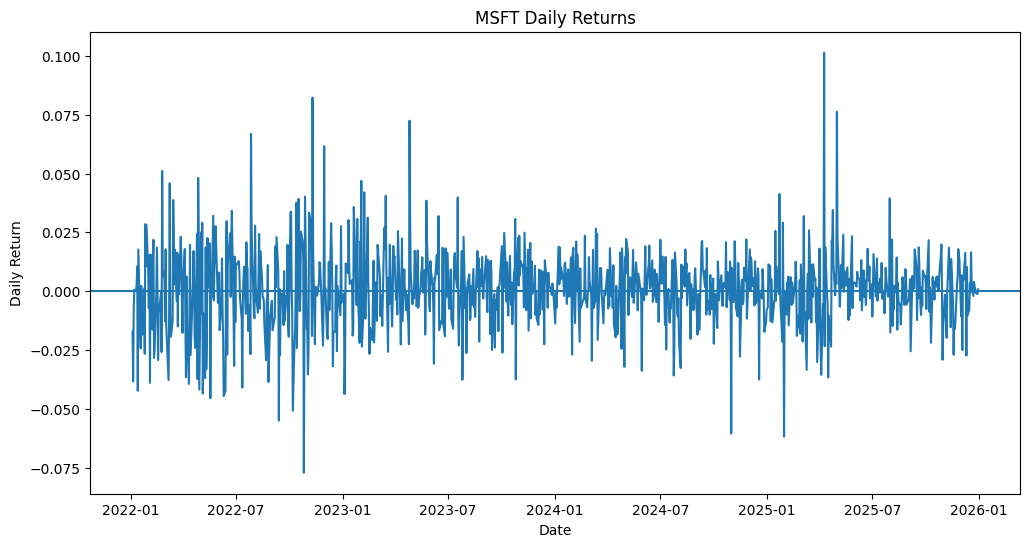

In [14]:
data["daily_return"] = data["Close"].pct_change()
plt.figure(figsize=(12,6))
plt.plot(data.index, data["daily_return"])
plt.title("MSFT Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.axhline(0)
plt.show()

In [15]:
print(data.columns)

MultiIndex([(       'Close', 'MSFT'),
            (        'High', 'MSFT'),
            (         'Low', 'MSFT'),
            (        'Open', 'MSFT'),
            (      'Volume', 'MSFT'),
            ('daily_return',     '')],
           names=['Price', 'Ticker'])


In [16]:
data.columns = [
    "Close_MSFT",
    "High_MSFT",
    "Low_MSFT",
    "Open_MSFT",
    "Volume_MSFT",
    "daily_return"
]

print(data.columns)


Index(['Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT', 'Volume_MSFT',
       'daily_return'],
      dtype='object')


In [17]:
data["daily_return"] = data["Close_MSFT"].pct_change()
data["daily_return"].describe()


count    1001.000000
mean        0.000550
std         0.016874
min        -0.077156
25%        -0.007993
50%         0.000780
75%         0.009791
max         0.101337
Name: daily_return, dtype: float64

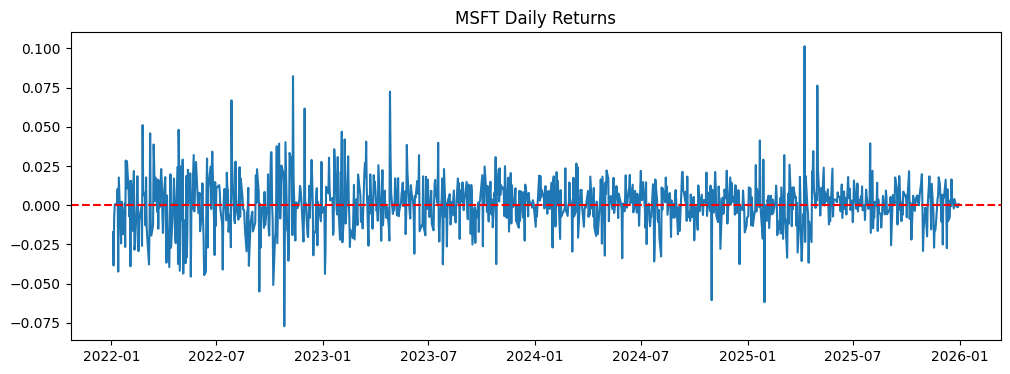

In [18]:
plt.figure(figsize=(12,4))
plt.plot(data.index, data["daily_return"])
plt.axhline(0, color='red', linestyle='--')
plt.title("MSFT Daily Returns")
plt.show()

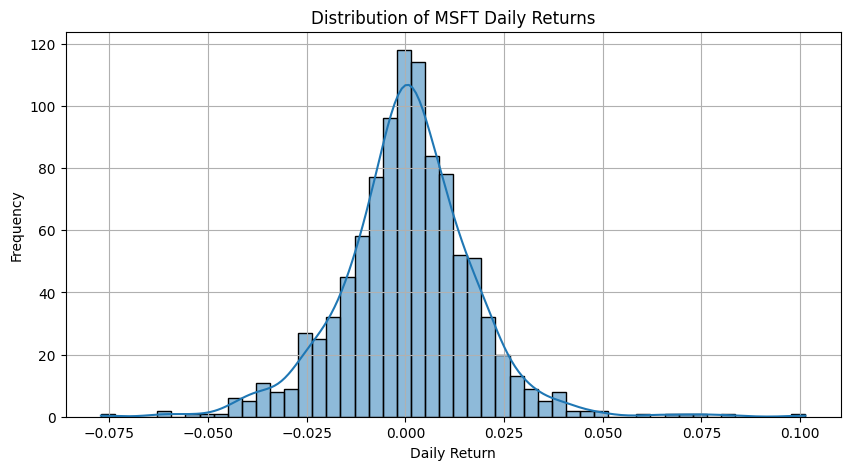

In [19]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data["daily_return"].dropna(), bins=50, kde=True)
plt.title("Distribution of MSFT Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [20]:
data["volatility_20"] = data["daily_return"].rolling(20).std()
data["anomaly"] = data["daily_return"].abs() > 3 * data["volatility_20"]
data["anomaly"].value_counts()


anomaly
False    995
True       7
Name: count, dtype: int64

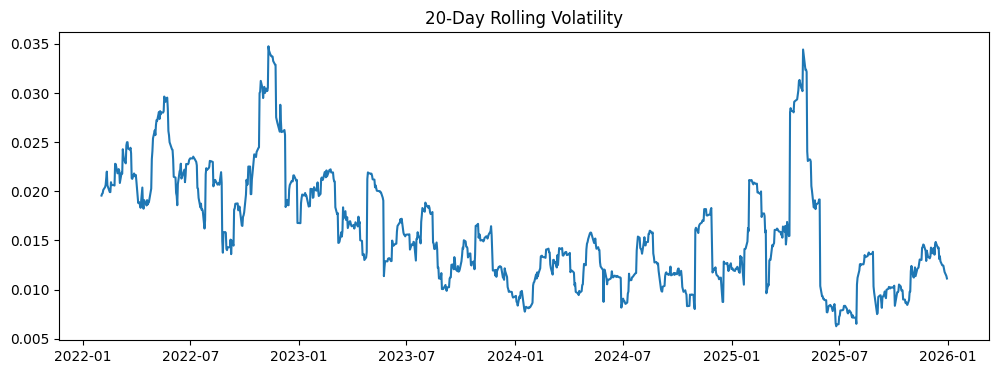

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(data.index, data['volatility_20'])
plt.title("20-Day Rolling Volatility")
plt.show()


In [22]:
anomalies = data[data["anomaly"] == True]
anomalies[["daily_return", "volatility_20"]]


,daily_return,volatility_20
Date,,
2022-07-27,0.066852,0.021739
2022-09-13,-0.054978,0.018167
2023-04-26,0.072435,0.021252
2023-05-25,0.038458,0.012281
2024-10-31,-0.060528,0.016102
2025-04-09,0.101337,0.028064
2025-07-31,0.039475,0.010509


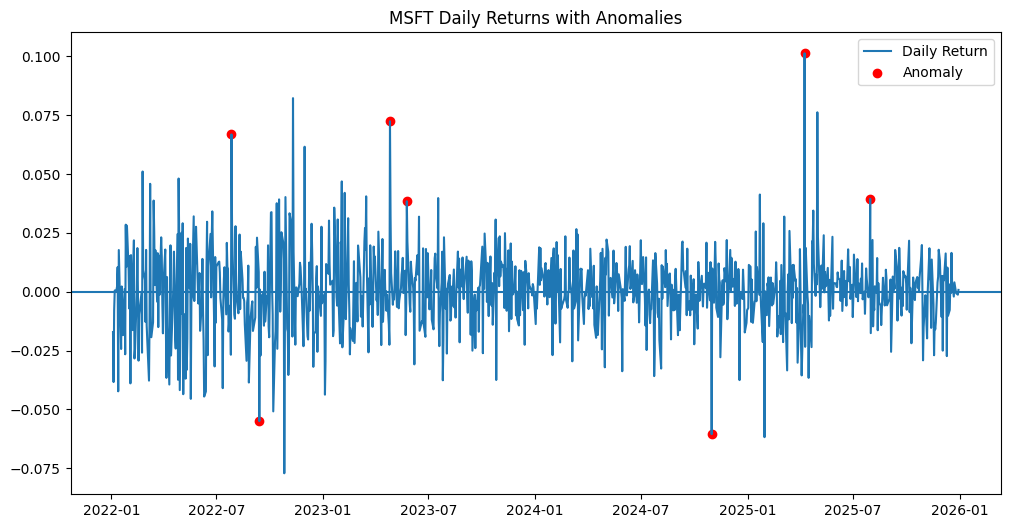

In [23]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data["daily_return"], label="Daily Return")
plt.scatter(
    anomalies.index,
    anomalies["daily_return"],
    color="red",
    label="Anomaly",
)
plt.axhline(0)
plt.legend()
plt.title("MSFT Daily Returns with Anomalies")
plt.show()


In [24]:
import numpy as np
data["anomaly_reason"] = np.where(
    data["anomaly"],
    "Extreme return relative to recent volatility",
    "Normal"
)


In [25]:
data["volume_change"] = data["Volume_MSFT"].pct_change()


In [26]:
features = data[[
    "daily_return",
    "volatility_20",
    "volume_change"
]].dropna()

features.head()


,daily_return,volatility_20,volume_change
Date,,,
2022-02-01,-0.007139,0.019566,-0.118294
2022-02-02,0.015222,0.019746,-0.105357
2022-02-03,-0.038952,0.019801,0.193635
2022-02-04,0.015569,0.020141,-0.197427
2022-02-07,-0.016311,0.020420,-0.187004


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [28]:
features_scaled[:5]


array([[-0.46258279,  0.61828374, -0.47220288],
       [ 0.86852224,  0.64954054, -0.43615881],
       [-2.35637498,  0.65904058,  0.39685821],
       [ 0.88913012,  0.71814695, -0.692676  ],
       [-1.0085567 ,  0.76658708, -0.6636366 ]])

In [29]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # ~1% anomalies
    random_state=42
)

iso_forest.fit(features_scaled)


IsolationForest(contamination=0.01, random_state=42)

In [30]:
iforest_preds = iso_forest.predict(features_scaled)
import pandas as pd

iforest_preds = pd.Series(
    iforest_preds,
    index=features.index
)
data["iforest_anomaly"] = False
data.loc[features.index, "iforest_anomaly"] = (iforest_preds == -1)

data["iforest_anomaly"].value_counts()


iforest_anomaly
False    992
True      10
Name: count, dtype: int64

In [31]:
data.loc[data["iforest_anomaly"] == True,
         ["daily_return", "volatility_20", "volume_change"]].head()


,daily_return,volatility_20,volume_change
Date,,,
2022-10-26,-0.077156,0.030000,1.373602
2022-11-10,0.082268,0.034762,0.661156
2022-11-28,-0.023152,0.026331,1.693048
2022-11-30,0.061624,0.028809,1.650557
2023-02-07,0.042022,0.021250,1.257812


In [34]:
print(data.columns)

Index(['Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT', 'Volume_MSFT',
       'daily_return', 'volatility_20', 'anomaly', 'anomaly_reason',
       'volume_change', 'iforest_anomaly'],
      dtype='object')


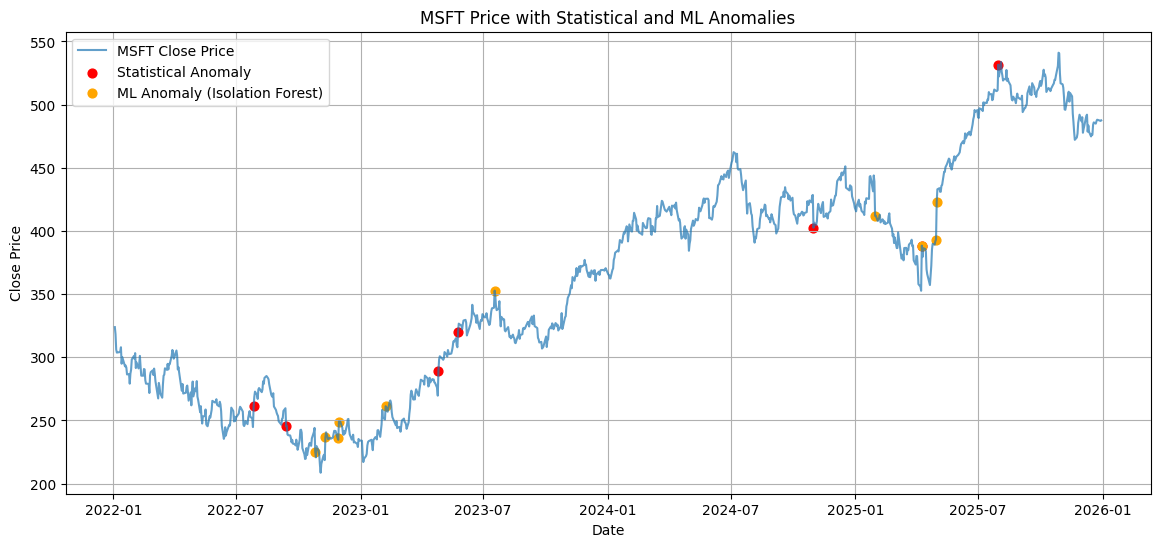

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Base price plot
plt.plot(
    data.index,
    data["Close_MSFT"],
    label="MSFT Close Price",
    alpha=0.7
)

# Statistical anomalies
plt.scatter(
    data[data["anomaly"]].index,
    data[data["anomaly"]]["Close_MSFT"],
    color='red', label="Statistical Anomaly", s=40
)

# ML anomalies (Isolation Forest)
plt.scatter(
    data[data["iforest_anomaly"]].index,
    data[data["iforest_anomaly"]]["Close_MSFT"],
    color='orange', label="ML Anomaly (Isolation Forest)", s=40
)

plt.title("MSFT Price with Statistical and ML Anomalies")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
